## `Classification Problem :- Sentiment analysis`

1. Problem statement
2. Data collection
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering/Selection
6. Model Building 
7. Model Evaluation
8. Model Deployment

## `Problem Statement`

**Build a sentiment analysis model to analyse customer reviews and feedback for a hospitality company. The model should be able to classify reviews as positive, negative, or neutral, and identify key topics or areas of concern.**

## `Objective`

**Create a machine learning solution capable of categorizing hospitality reviews into sentiment classes and extracting significant topics, facilitating informed decision-making and service enhancement.**

## `Data collection`

Data has been downloaded from kaggle website : https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

## `Loading the required Libraries and Dataset`

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import emoji
import autocorrect
from nltk.stem import WordNetLemmatizer

from joblib import Memory
import os
import pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"C:\Users\rajay\Downloads\tripadvisor_hotel_reviews.csv")

In [5]:
data.head() # first five row of the dataset

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
data.info() #about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
data.shape # Rows and columns of the dataset we have 20491 rows and 2 columns

(20491, 2)

In [8]:
data.describe() # Descriotion about the data

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
data.describe().T # Transformed vertical to horizantal

,count,mean,std,min,25%,50%,75%,max
Rating,20491.0,3.952223,1.23303,1.0,3.0,4.0,5.0,5.0


In [10]:
data.describe(include="all").T # This includes numerical and categorical.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Review,20491,20491,nice hotel expensive parking got good deal sta...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,20491.0,NaN,NaN,NaN,3.952223,1.23303,1.0,3.0,4.0,5.0,5.0


In [11]:
data.isna().sum() # Identifying Missing values from the dataset and we don't have any missing values. 

Review    0
Rating    0
dtype: int64

In [12]:
data.duplicated().sum() # Identifying duplicate values and we don't have any duplicate entries.

0

In [13]:
data.Rating.unique() 

array([4, 2, 3, 5, 1], dtype=int64)

In [14]:
data.Rating.value_counts() # count of each rating 

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

## `Exploratory Data Analysis(EDA) - Univariate Analysis`

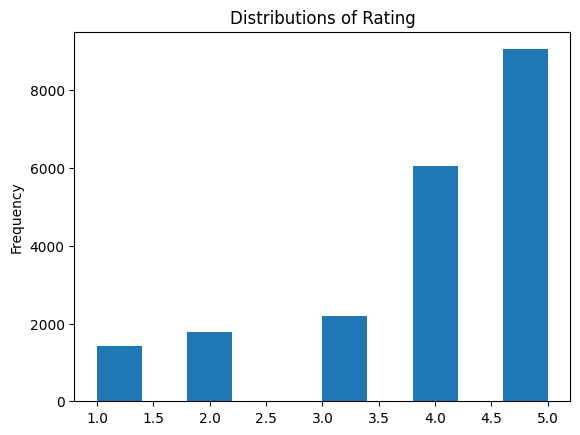

In [13]:
# Distribution of target variable
data.Rating.plot(kind='hist')
plt.title('Distributions of Rating')
plt.show()

* Above hist plot shows that distributions of rating and we can observe that above 4 ratings are postive ratings, 3 to 4 are Neutral and below 3 are Negative ratings.

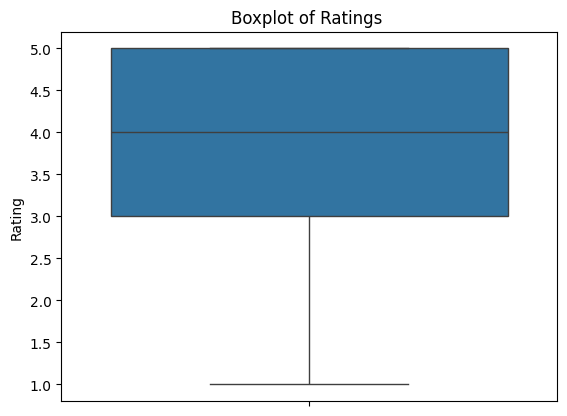

In [15]:
# Box plot to Identify the outliers
sns.boxplot(data= data.Rating)
plt.title('Boxplot of Ratings ')
plt.show()

* The box plot shows that we don't have outliers in Rating column

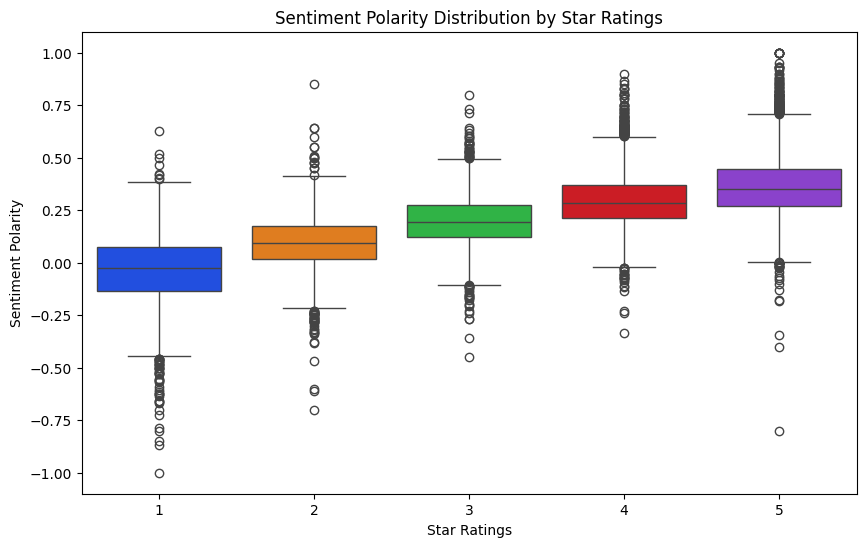

In [16]:
from textblob import TextBlob

data['Sentiment_Polarity'] = data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Sentiment_Polarity', data=data, palette="bright")
plt.title('Sentiment Polarity Distribution by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Polarity')
plt.show()

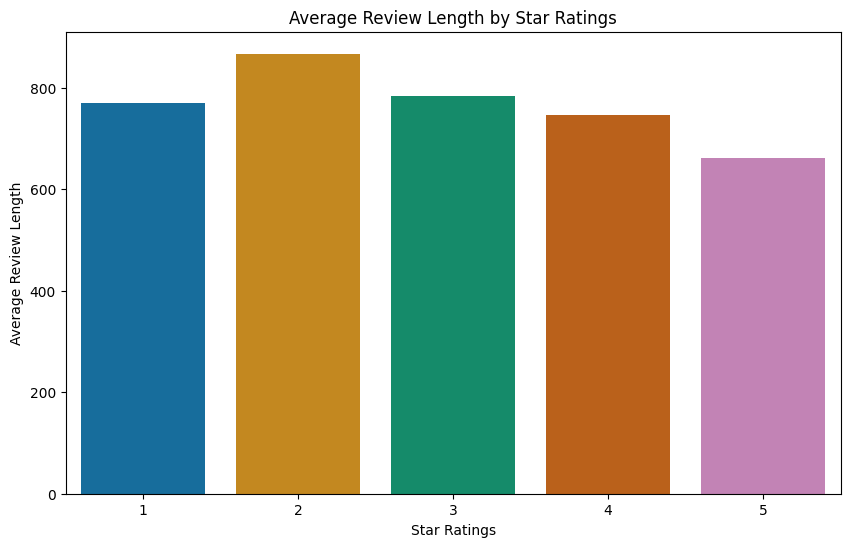

In [17]:

data['Review_Length'] = data['Review'].apply(len)

avg_review_length = data.groupby('Rating')['Review_Length'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y='Review_Length', data=avg_review_length, palette='colorblind')
plt.title('Average Review Length by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Average Review Length')
plt.show()

* we can clearly observe that Negative reviews have more length

In [18]:
data.Review_Length.value_counts()

Review_Length
444     43
403     43
431     40
351     40
316     39
        ..
1524     1
2813     1
1800     1
1675     1
5557     1
Name: count, Length: 2543, dtype: int64

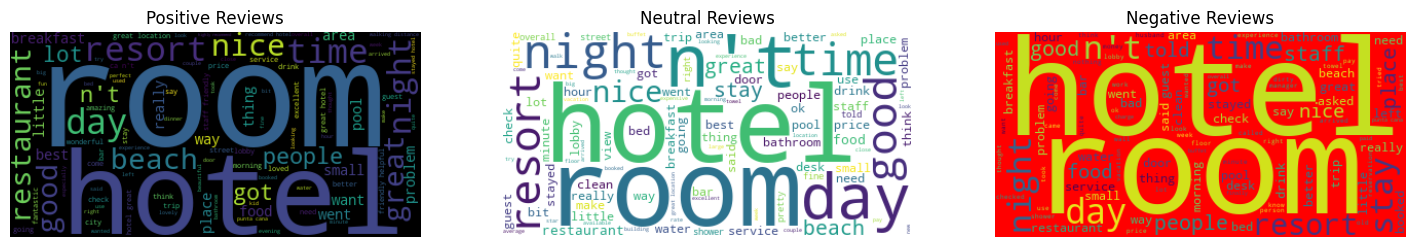

In [19]:
positive_reviews = " ".join(review for review in data[data['Rating'] >= 4].Review)
neutral_reviews = " ".join(review for review in data[data['Rating'] == 3].Review)
negative_reviews = " ".join(review for review in data[data['Rating'] <= 2].Review)

positive_wordcloud = WordCloud(background_color='black', max_words=100, contour_width=3, contour_color='green').generate(positive_reviews)
neutral_wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='orange').generate(neutral_reviews)
negative_wordcloud = WordCloud(background_color='red', max_words=100, contour_width=3, contour_color='red').generate(negative_reviews)

plt.figure(figsize=(18,12))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

## `Sentiment Analysis on Text Data`

In [20]:
def get_sentiment_nltk(rating):
    if rating >= 4:
        return 'Positive'
    elif rating < 3:
        return 'Negative'
    else:
        return 'Neutral'

In [21]:
data['Sentiment'] = data['Rating'].apply(get_sentiment_nltk)

In [22]:
data.head()

,Review,Rating,Sentiment_Polarity,Review_Length,Sentiment
0,nice hotel expensive parking got good deal sta...,4,0.208744,593,Positive
1,ok nothing special charge diamond member hilto...,2,0.214923,1689,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420,1427,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,0.504825,600,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.384615,1281,Positive


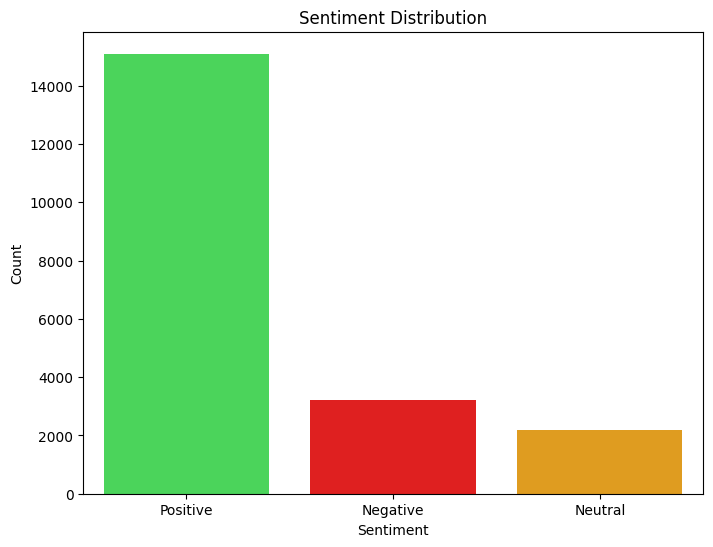

In [23]:
#count plot for sentiments of reviews
plt.figure(figsize=(8, 6))
colors =["#34eb49", "red", "orange"]
sns.countplot(x='Sentiment', data=data, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

* There are more postive Reviews.

In [24]:
# available styles in matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

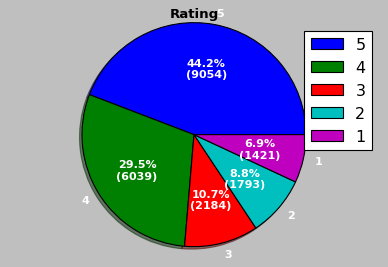

In [25]:
plt.style.use('classic')

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(figsize = (6,3.5))
df_class = data['Rating'].value_counts().to_frame()
labels = df_class.index
values = df_class.iloc[:,0].to_list()
ax.pie(x = values, labels = labels, autopct = autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':10, 'fontweight':'bold'})
ax.legend(labels, loc = 'best')
ax.set_title('Rating', fontsize = 12, fontweight = "bold", color = "black")
ax.axis('equal')

fig.show()

* above pie chart shows that percentage of the rating and count of the rating

In [26]:
# Distribution of Target Variable
data['Sentiment'].value_counts(normalize=True)

Sentiment
Positive    0.736567
Negative    0.156849
Neutral     0.106583
Name: proportion, dtype: float64

In [27]:
print(data.loc[3, 'Review']) # Read one review
len(data.loc[3, 'Review']) # Length of the review

unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent stay,  


600

In [28]:
sentiment_mapping = {'Positive': 1, 'Negative': 0,'Neutral':2}
data['Sentiment_numeric'] = data['Sentiment'].map(sentiment_mapping)
print(data[['Sentiment', 'Sentiment_numeric']].head())

  Sentiment  Sentiment_numeric
0  Positive                  1
1  Negative                  0
2   Neutral                  2
3  Positive                  1
4  Positive                  1


In [29]:
def eda(data,column): # Identifying what kind of data it is for best preprocessing
    lower = " ".join(data[column]).islower()
    html = data[column].apply(lambda x:True if re.search("<.*?>",x) else False).sum()
    urls = data[column].apply(lambda x:True if re.search("http[s]?://.+?\S+",x) else False).sum()
    tags = data[column].apply(lambda x:True if re.search("#\S+",x) else False).sum()
    mentions = data[column].apply(lambda x:True if re.search("@\S+",x) else False).sum()
    un_wanted = data[column].apply(lambda x:True if re.search("[]\.\*'\-#$%^&)(0-9]!@",x) else False).sum()
    emojiss = data[column].apply(lambda x:True if emoji.emoji_count(x) else False).sum()
    
    if lower == False:
        print("your data contains both the cases")
    if html>0:
        print("your data contains both html tags")
    if urls>0:
        print("your data contains both urls")
    if tags>0:
        print("your data contains both tags")
    if mentions>0:
        print("your data contains both mentions")
    if un_wanted>0:
        print("your data contains both un_wanted")
    if emojiss>0:
        print("your data contains both emojiss")

In [30]:
eda(data,"Review")

your data contains both the cases
your data contains both emojiss


In [31]:
data["Review"].apply(lambda x:True if emoji.emoji_count(x) else False).sum()

20

+ So, over data contains emojies and all letters in different casesess so we will convert that into lower case
* 20 emojis found and we will convert that into text

In [32]:
def basic_pp(x,emoj="T",spc="F"):
    x = x.lower() #converting into lower case    
    if emoj=="T":
        x =emoji.demojize(x) #converting emoji to text
    x = re.sub("[]\:.\*'\-#$%^&)(0-9]"," ",x) #removing unwanted charecters
    
    return x

In [33]:
data["Review"]=data["Review"].apply(basic_pp,args=("T","T"))

## ` Identify Input and Output`

In [34]:
X = data.Review 
y = data.Sentiment_numeric
print(X.shape, y.shape)

(20491,) (20491,)


## `Splitting the Data into train and test`

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16392,) (16392,)
(4099,) (4099,)


In [37]:
X_train, X_test, y_train, y_test

(10673    weekend break travelled group    suprise   th ...
 2413     think carefully sure know exactly getting hote...
 12774    great views spacious rooms, just day stay mill...
 17088    want leave food beverage staff housekeeping st...
 19887    hot hot not rooms certainly different clean eq...
                                ...                        
 9395     better expected, experience hotel better expec...
 5084     amazing way hotel absolutely amazing help make...
 16463    typical package tour hotel hyatt bali typical ...
 12659    absolutely impeccable stayed soho met   nights...
 11855    great hotel comfortable hotel booked short not...
 Name: Review, Length: 16392, dtype: object,
 17864    happen quality control arrived qt saturday sep...
 18191    good starting point ruined lack service staff ...
 5670     good location bit over priced hotel just puert...
 376      hotel vintage park just got staying hotel vint...
 13050    sirenis great look seeking nightlife sirenis 

## `Data Preprocessing on train data (X_train)`

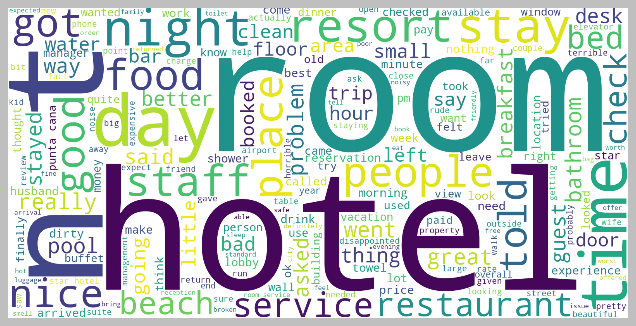

In [38]:
#Negative Reviews
# Function to display word cloud
def display_wordcloud_text(data):
    wc = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(data))

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

display_wordcloud_text(X_train[y_train ==0])


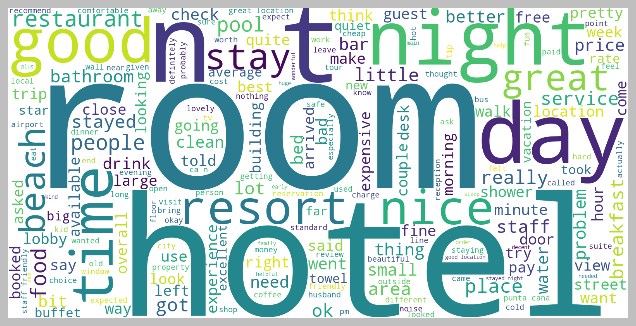

In [39]:
# neutral reviews
display_wordcloud_text(X_train[y_train==2])

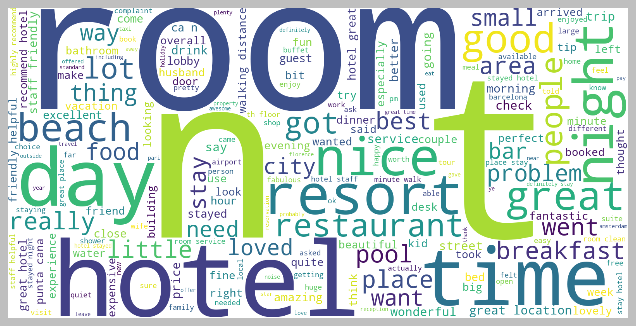

In [40]:
# positive reviews
display_wordcloud_text(X_train[y_train==1])

In [41]:
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [44]:
def basic_pp1(doc):
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatization gives correct words but takes lot of time.
    
    # Join and return
    return " ".join(lemmatized_tokens)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(preprocessor=basic_pp1)
%time X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)

CPU times: total: 14.2 s
Wall time: 16.6 s
(16392, 41507)


## `Data Preprocessing on test data (X_test)`

In [46]:
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)

(4099, 41507)


## `Building a Model (i.e. Training the model)`

In [47]:
nb = MultinomialNB() 
%time nb.fit(X_train_dtm, y_train) 

CPU times: total: 15.6 ms
Wall time: 17.7 ms


MultinomialNB()

## `Evaluating on Train Data`

In [48]:
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

accuracy_score(y_train, y_train_pred)

0.9009272816007808

In [49]:
confusion_matrix(y_train,y_train_pred)

array([[ 2238,   258,    75],
       [  147, 11870,    57],
       [  206,   881,   660]], dtype=int64)

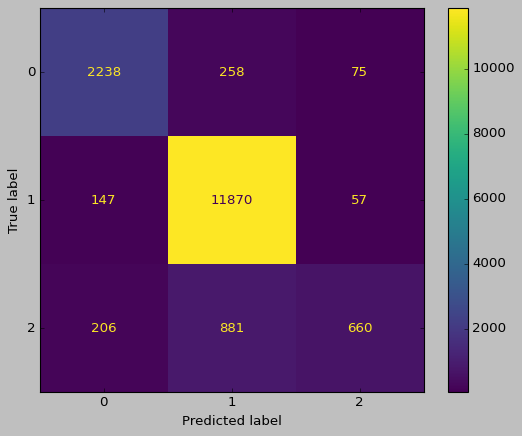

In [50]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_train,y_train_pred,labels = nb.classes_))
cm.plot()
plt.show()

In [51]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2571
           1       0.91      0.98      0.95     12074
           2       0.83      0.38      0.52      1747

    accuracy                           0.90     16392
   macro avg       0.87      0.74      0.78     16392
weighted avg       0.90      0.90      0.89     16392



## `Evaluating on Test Data`

In [52]:
# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

accuracy_score(y_test, y_test_pred)

0.8460600146377165

In [53]:
confusion_matrix(y_test,y_test_pred)

array([[ 493,  119,   31],
       [  58, 2948,   13],
       [  88,  322,   27]], dtype=int64)

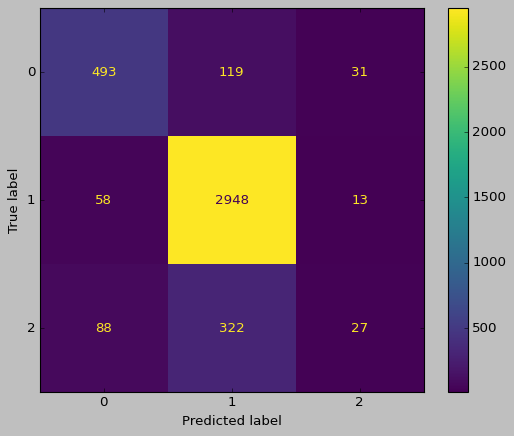

In [54]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred,labels = nb.classes_))
cm.plot()
plt.show()

In [55]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       643
           1       0.87      0.98      0.92      3019
           2       0.38      0.06      0.11       437

    accuracy                           0.85      4099
   macro avg       0.67      0.60      0.60      4099
weighted avg       0.80      0.85      0.81      4099



In [56]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: basic_pp1(doc))

CPU times: total: 12.2 s
Wall time: 14.4 s


In [57]:
%time X_test_clean = X_test.apply(lambda doc: basic_pp1(doc))

CPU times: total: 2.66 s
Wall time: 3.82 s


In [58]:
#Naive Bayes is giving good result, lets start with remaining algorithms

## `Pipeline`

In [59]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'xgboost': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}

param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000], 
            'classifier__C': [0.1, 1], 
            'classifier__penalty': ['l2'],  # Use only L2 penalty for logistic regression
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'xgboost': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 2000, 5000], 
            'classifier__max_depth': [3],
            'classifier__learning_rate': [0.1],
            'classifier__n_estimators': [60]  # Limit the number of estimators to 60
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 1min 27s
Wall time: 1min 48s
Score on Test Data:  0.8363015369602342
********** logistic_regression **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 3min 16s
Wall time: 4min 6s
Score on Test Data:  0.806050256160039
********** xgboost **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 22min 21s
Wall time: 4min 30s
Score on Test Data:  0.8111734569407173


In [60]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    solver='saga'))])

xgboost
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=2000)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
    

## `Saving model using pickle`

In [62]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    pickle.dump(model,open(fr"C:\Users\madas\Downloads\{name}1.pkl","wb"))
    model_final = pickle.load(open(fr"C:\Users\madas\Downloads\{name}1.pkl","rb"))
    
    %time y_test_pred = model_final.predict(X_test_clean)
    print("Test Score (accuracy)", accuracy_score(y_test, y_test_pred))
    print(classification_report(y_test,y_test_pred))
    
    print("Model Size:", os.path.getsize(fr'C:\Users\madas\Downloads\{name}1.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 500 ms
Wall time: 488 ms
Test Score (accuracy) 0.8363015369602342
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       643
           1       0.88      0.95      0.91      3019
           2       0.37      0.16      0.22       437

    accuracy                           0.84      4099
   macro avg       0.66      0.63      0.63      4099
weighted avg       0.81      0.84      0.82      4099

Model Size: 786471 Bytes
********** logistic_regression **********
CPU times: total: 328 ms
Wall time: 506 ms
Test Score (accuracy) 0.806050256160039
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       643
           1       0.95      0.86      0.90      3019
           2       0.32      0.51      0.39       437

    accuracy                           0.81      4099
   macro avg       0.67      0.71      0.68      4099
weighted avg       0.85  

### All the three models are giving approximately same accuracy, I have Deployed the model with Logistic Regression
* Considering the performance and model size, Logistic Regression might be the best choice for deployment due to its balance between accuracy and handling of class 2. It also has the smallest model size, which could be beneficial for server deployment.